<a href="https://colab.research.google.com/github/shikharkyadesultory/GNN_resilient_network/blob/main/Steady_State_GNN(GCN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

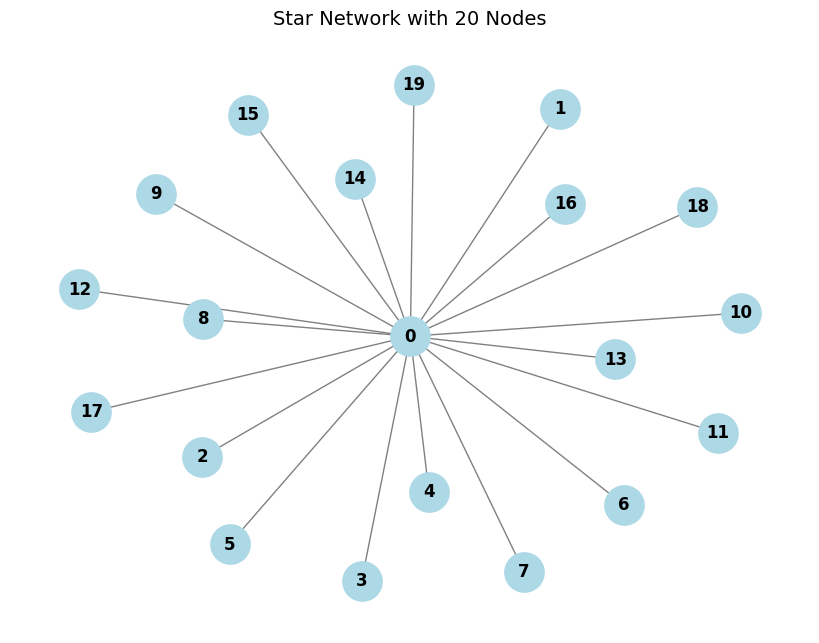

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

n = 20
G = nx.star_graph(n - 1)
plt.figure(figsize = (8,6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels = True, node_size = 800, node_color='lightblue',font_size=12,
        font_weight='bold', edge_color='gray')
plt.title(f"Star Network with {n} Nodes", fontsize=14)
plt.show()

In [ ]:
adj_matrix = nx.adjacency_matrix(G).todense()
print("Adjacency Matrix:")
print(adj_matrix)
center_degree = G.degree(0)
print(f"\nCenter node (0) has degree: {center_degree}")
print(f"Peripheral nodes have degree: 1")

Adjacency Matrix:
[[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]

Center node (0) has degree: 19
Peripheral nodes have degree: 1


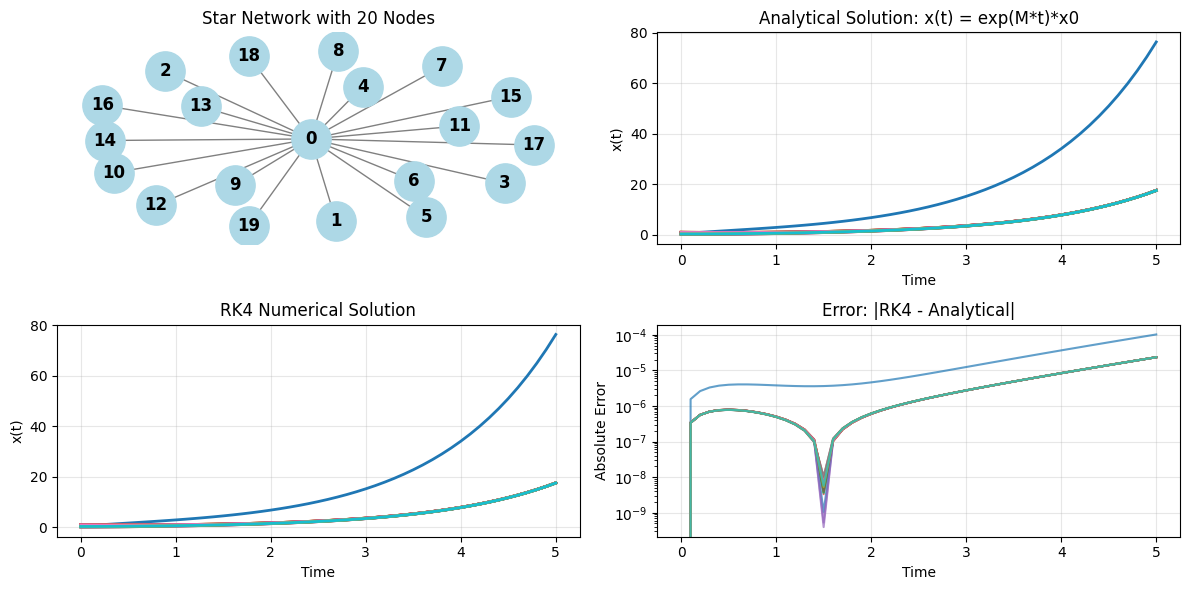

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.linalg import expm

def create_network(n):
  G = nx.star_graph(n - 1)
  A = nx.adjacency_matrix(G).todense()
  return G,np.array(A)

n = 20
a = -0.5
b = 0.3
t_end = 5.0
dt = 0.1

G,A = create_network(n)
M = a * np.eye(n) + b * A
x0 = np.random.random(n)
t_points = np.arange(0,t_end+dt , dt)
x_a = np.zeros((len(t_points),n))
for i,t in enumerate(t_points):
  x_a[i] = expm(M*t) @ x0
def dxdt(t,x):
  return M @ x
def rk_4(f, t0, x0, h, t_end):
  n_steps = int((t_end - t0) / h) + 1
  t_points = np.linspace(t0, t_end, n_steps)
  x_points = np.zeros((n_steps, len(x0)))
  x_points[0] = x0

  for i in range(1 , n_steps):
    t = t_points[i - 1]
    x = x_points[i - 1]

    k1 = h * f(t, x)
    k2 = h * f(t + 0.5 * h, x + 0.5 * k1)
    k3 = h * f(t + 0.5 * h, x + 0.5 * k2)
    k4 = h * f(t + h, x + k3)

    x_points[i] = x + (k1 + 2 * k2 + 2 * k3 + k4) / 6

  return t_points, x_points
t_rk4, x_rk4 = rk_4(dxdt, 0, x0, dt, t_end)
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels = True, node_size = 800, node_color='lightblue',font_size=12,
        font_weight='bold', edge_color='gray')
plt.title(f'Star Network with {n} Nodes')
plt.subplot(2,2,2)
for i in range(n):
  plt.plot(t_points, x_a[:,i], linewidth = 2)
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.title('Analytical Solution: x(t) = exp(M*t)*x0')
# plt.legend()
plt.grid(True, alpha=0.3)
plt.subplot(2, 2, 3)
for i in range(n):
    plt.plot(t_rk4, x_rk4[:, i], linewidth=2)
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.title('RK4 Numerical Solution')
# plt.legend()
plt.grid(True, alpha=0.3)
plt.subplot(2, 2, 4)
error = np.abs(x_a - x_rk4)
for i in range(n):
    plt.plot(t_rk4, error[:, i], alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Absolute Error')
plt.title('Error: |RK4 - Analytical|')
# plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

plt.tight_layout()
plt.show()


IPR range: 0.083664 to 0.263156


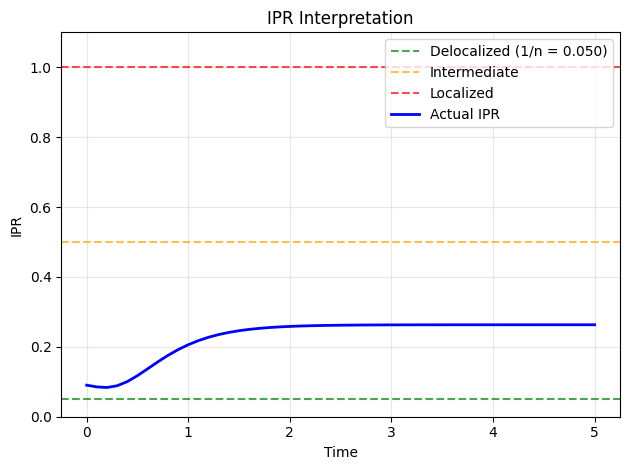

In [ ]:
def ipr_R(data):
  num_e = np.sum(data**4, axis = 1) ## summing over nodes
  denom_e = np.sum(data**2, axis=1)**2
  return num_e/(denom_e + 1e-10)
eig_val, eig_vec = np.linalg.eig(M)
c = np.linalg.solve(eig_vec,x0)
poly_Xt = np.zeros((len(t_points),n))
for j,t in enumerate(t_points):
  exp_diag = np.diag(np.exp(eig_val * t))
  poly_Xt[j,:] = eig_vec @ exp_diag @ c
ipr_values = np.zeros(len(t_points))
for i,t in enumerate(t_points):
  state_vector = poly_Xt[i]
  num = np.sum(state_vector**4)
  denom = np.sum(state_vector**2)**2
  ipr_values[i] = num/(denom + 1e-10)
print(f"\nIPR range: {np.min(ipr_values):.6f} to {np.max(ipr_values):.6f}")

# IPR interpretation

# plt.subplot(2, 3, 6)
theoretical_values = [1/n, 0.5, 1.0]  # 1/n (delocalized), 0.5, 1 (localized)
labels = [f'Delocalized (1/n = {1/n:.3f})', 'Intermediate', 'Localized']
colors = ['green', 'orange', 'red']

for val, label, color in zip(theoretical_values, labels, colors):
    plt.axhline(y=val, color=color, linestyle='--', alpha=0.7, label=label)

plt.plot(t_points, ipr_values, 'b-', linewidth=2, label='Actual IPR')
plt.xlabel('Time')
plt.ylabel('IPR')
plt.title('IPR Interpretation')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1.1)

plt.tight_layout()
plt.show()



#***GCN***

In [1]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.9 MB/s eta 0:00:00


In [2]:
import math
import torch
import torch.nn as nn

def LSIGF(h, S, x, b=None):
  F = h.shape[0] ##output feature
  E = h.shape[1] ##edge weights
  K = h.shape[2] ##filter taps
  G = h.shape[3] ##input features
  assert S.shape[0] == E
  N = S.shape[1]
  assert S.shape[2] == N
  B = x.shape[0]
  assert x.shape[1] == G
  assert x.shape[2] == N
  x = x.reshape([B,1,G,N])
  S = S.reshape([1,E,N,N])
  z = x.reshape([B,1,1,G,N]).repeat([1,E,1,1,1]) ## for k=0
  for k in range(1,K):
    x = torch.matmul(x,S) #BxExGxN
    xS = x.reshape([B,E,1,G,N])
    z = torch.cat((z,xS),dim=2) ## BxExKxGxN
  y = torch.matmul(z.permute(0,4,1,2,3).reshape([B,N,E*K*G]),h.reshape([F,E*K*G]).permute(1,0)).permute(0,2,1)
  if b is not None:
    y = y + b
  return y

class GraphFilter(nn.Module):
  def __init__(self, G, F, K, E=1, bias=True):
    super().__init__()
    self.G = G
    self.F = F
    self.K = K
    self.E = E
    self.S = None ## GSO not assigned yet
    self.weight = nn.parameter.Parameter(torch.Tensor(F,E,K,G))
    if bias:
      self.bias = nn.parameter.Parameter(torch.Tensor(F,1))
    else:
      self.register_parameter('bias', None)
    self.reset_parameters()
  def reset_parameters(self):
    stdv = 1. / math.sqrt(self.G * self.K)
    self.weight.data.uniform_(-stdv,stdv)
    if self.bias is not None:
      self.bias.data.uniform_(-stdv,stdv)
  def addGSO(self, S):
    assert len(S.shape) == 3
    assert S.shape[0] == self.E
    self.N = S.shape[1]
    assert S.shape[2] == self.N
    self.S = S
  def forward(self, x):
    B = x.shape[0]
    F = x.shape[1]
    Nin = x.shape[2]
    ## getting in the zero padding ##
    if Nin < self.N:
      x = torch.cat((x,torch.zeros(B,F,self.N-Nin,dtype=x.dtype).to(device=x.device)),dim=2)
    u = LSIGF(self.weight, self.S, x, self.bias)
    if Nin < self.N:
      u = torch.index_select(u,2,torch.arange(Nin).to(u.device))
    return u
  def extra_repr(self):
    reprString = "in_features=%d, out_features=%d, " % (
                self.G, self.F) + "filter_taps=%d, " % (
                self.K) + "edge_features=%d, " % (self.E) +\
                "bias=%s, " % (self.bias is not None)
    if self.S is not None:
      repString += "GSO stored"
    else:
      repString += "GSO not stored"
    return reprString

zeroTolerance = 1e-9
## perm identity ##
def permIdentity(S):
  assert len(S.shape) == 2 or len(S.shape) == 3
  if len(S.shape) == 2:
    assert S.shape[0] == S.shape[1]
    S = S.reshape([1, S.shape[0], S.shape[1]])
    scalarWeights = True
  else:
    assert S.shape[1] == S.shape[2]
    scalarWeights = False
  N = S.shape[1]
  order = np.arange(N)
  if scalarWeights:
    S = S.reshape([N, N])
  return S, order.tolist()

def permDegree(S):
  assert len(S.shape) == 2 or len(S.shape) == 3
  scalarWeights = False
  if len(S.shape) == 2:
    assert S.shape[0] == S.shape[1]
    S = S.reshape([1, S.shape[0], S.shape[1]])
    scalarWeights = True
  else:
    assert S.shape[1] == S.shape[2]
    scalarWeights = False

  d = np.sum(np.sum(S, axis=1),axis = 0) ## computing the degree
  order = np.argsort(d)
  order = np.flip(order,0)
  S = S[:,order,:][:,:,order]
  if scalarWeights:
    S = S.reshape([S.shape[1],S.shape[2]])
  return S,order.tolist()

def changeDataType(x, dataType):
  if 'dtype' in dir(x):
    varType = x.dtype
  if 'numpy' in repr(dataType):
    if 'torch' in repr(varType):
      x = x.cpu().numpy().astype(dataType)
    elif 'numpy'in repr(type(x)):
      x = x.astype(dataType)
  elif 'torch' in repr(dataType):
    if 'torch' in repr(varType):
      x = x.type(dataType)
    elif 'numpy' in repr(type(x)):
      x = torch.tensor(x, dtype = dataType)
  return x

#**GNN architecture**

In [3]:
import math
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

class LocalActivationGNN(nn.Module):
  def __init__(self,
               dimNodeSignals, nFilterTaps, bias,
               nonLinearity=nn.ReLU, kHopActivation = None,
               nSelectedNodes = None, poolingFunction = None, poolingSize = None,
               dimLayersMLP = None, dimLayersIPR = None, GSO=None, order=None, n_classes=2): # Added n_classes
    super().__init__()
    self.L = len(nFilterTaps)
    self.F = dimNodeSignals
    self.K = nFilterTaps
    self.kHop = kHopActivation if kHopActivation is not None else [1] * self.L
    self.bias = bias
    self.sigma = nonLinearity
    self.n_classes = n_classes # Store n_classes

    if GSO is not None:
      if len(GSO.shape) == 2:
        GSO = GSO.reshape([1, GSO.shape[0], GSO.shape[1]])
      self.S = torch.tensor(GSO, dtype=torch.float32)
      self.N = GSO.shape[1]
    else:
      self.S = None
      self.N = dimNodeSignals[0]
    nSelectedNodes = nSelectedNodes if nSelectedNodes is not None else [self.N] * self.L
    # Change poolingFunction to use mean pooling
    poolingFunction = poolingFunction if poolingFunction is not None else lambda n_in, n_out, alpha: lambda x: torch.mean(x, dim=-1, keepdim=True)
    poolingSize = poolingSize if poolingSize is not None else [1]  * self.L
    dimLayersMLP = dimLayersMLP if dimLayersMLP is not None else []
    dimLayersIPR = dimLayersIPR if dimLayersIPR is not None else [] # Keep IPR layers config

    if order is not None:
      self.permFunction = eval('perm' + order)
      if self.S is not None:
        self.S, self.order = self.permFunction(self.S.numpy())
        self.S = torch.tensor(self.S, dtype=torch.float32)
      else:
        self.order = list(range(self.N))
    else:
      self.permFunction = permIdentity
      self.order = list(range(self.N))
    self.alpha = poolingSize
    self.rho = poolingFunction

    ## Graph Filtering Layers ##
    gfl = []
    for l in range(self.L):
      gfl.append(GraphFilter(self.F[l],self.F[l+1], self.K[l], 1, self.bias))
      if self.S is not None:
        gfl[-1].addGSO(self.S)
      ## Activation nn.ReLU
      gfl.append(self.sigma())
      ## Pooling
      pooling_layer = self.rho(nSelectedNodes[l],nSelectedNodes[l+1],self.alpha[l])
      gfl.append(pooling_layer)
    self.GFL = nn.Sequential(*gfl)

    ## Multi Layer Perceptron Readout (for classification)
    fc = [] ## Fully Connected
    if len(dimLayersMLP) > 0:
      dimInputMLP = nSelectedNodes[-1] * self.F[-1]
      fc.append(nn.Linear(dimInputMLP,dimLayersMLP[0], bias=self.bias))
      fc.append(self.sigma())

      for l in range(len(dimLayersMLP) - 1):
        fc.append(nn.Linear(dimLayersMLP[l], dimLayersMLP[l+1], bias=self.bias))
        if l < len(dimLayersMLP) - 2:
          fc.append(self.sigma())
      # Final layer for classification
      fc.append(nn.Linear(dimLayersMLP[-1], self.n_classes, bias=self.bias))
    else:
      # Final layer for classification if no MLP hidden layers
      dimInputMLP = nSelectedNodes[-1] * self.F[-1]
      fc.append(nn.Linear(dimInputMLP, self.n_classes, bias=self.bias))

    self.MLP = nn.Sequential(*fc)

    ## IPR Regression Layers
    ipr_layers = []
    # Input dimension for IPR regression is the output of the GFL, before the classification MLP
    ipr_input_dim = nSelectedNodes[-1] * self.F[-1]

    if len(dimLayersIPR) > 0:
        ipr_layers.append(nn.Linear(ipr_input_dim, dimLayersIPR[0], bias=self.bias))
        ipr_layers.append(self.sigma())
        for l in range(len(dimLayersIPR) - 1):
            ipr_layers.append(nn.Linear(dimLayersIPR[l], dimLayersIPR[l + 1], bias=self.bias))
            if l < len(dimLayersIPR) - 2:
                ipr_layers.append(self.sigma())
        # Final layer for IPR regression (outputting a single value)
        ipr_layers.append(nn.Linear(dimLayersIPR[-1], 1, bias=self.bias))
    else:
        # Final layer for IPR regression if no hidden layers
        ipr_layers.append(nn.Linear(ipr_input_dim, 1, bias=self.bias))

    self.IPR_Regressor = nn.Sequential(*ipr_layers)


  def forward(self,x):
    if self.S is not None:
      x = x[:,:,self.order]
    y = self.GFL(x)
    y_flat = y.reshape(y.shape[0],-1)

    # Pass the flattened GFL output to both the classification MLP and the IPR regressor
    cls_output = self.MLP(y_flat)
    ipr_output = self.IPR_Regressor(y_flat)

    return cls_output, ipr_output.squeeze() # Return both outputs

#**Create Star Network and Evaluation Functionals**

In [4]:
### Defining the GSO ###
from sklearn.metrics import r2_score
def create_star_network(n_nodes, center_weight=1.0, edge_weight=0.5):
  S = np.zeros((n_nodes,n_nodes))
  center_node = 0
  for i in range(1,n_nodes):
    S[center_node, i] = edge_weight
    S[i, center_node] = edge_weight
  np.fill_diagonal(S, center_weight)
  return S
#### Synthetic DataSet for the star network ####
from torch_geometric.data import Dataset
class StarNetworkDataset(Dataset):
  def __init__(self,n_samples=1000, n_nodes=10, n_features=3, n_classes=2):
    self.n_samples = n_samples
    self.n_nodes = n_nodes
    self.n_features = n_features
    self.n_classes = n_classes
    self.adj_matrix = create_star_network(n_nodes)
    self.data = []
    self.labels = []
    self.ipr_targets = [] # Store IPR targets

    for _ in range(n_samples):
      features = np.random.randn(n_features, n_nodes)
      features[:,0] += np.random.choice([-2,2], size=n_features)
      label = int(np.mean(features[:,0]) > 0)

      # Calculate IPR target
      node_features_for_ipr = features[0] # Using the first feature dimension for IPR calculation
      squared = np.abs(node_features_for_ipr) ** 2
      numerator = np.sum(squared ** 2)
      denominator = np.sum(squared) ** 2
      ipr_value = numerator / denominator if denominator != 0 else 0.0 # Handle division by zero

      self.data.append(torch.tensor(features, dtype=torch.float32))
      self.labels.append(label)
      self.ipr_targets.append(ipr_value) # Append IPR target

  def __len__(self):
    return self.n_samples

  def __getitem__(self, idx):
    return self.data[idx], self.labels[idx], torch.tensor(self.ipr_targets[idx], dtype=torch.float32) # Return all three

## Train Function ##
def train_model(model, train_loader, val_loader, optimizer, criterion_cls, criterion_ipr, epochs=100, device='cpu'):
  train_losses = {'cls':[],'ipr':[], 'total':[]}
  val_losses = {'cls':[],'ipr':[],'total':[]}
  val_accuracies = []
  val_ipr_errors = [] # To store IPR errors for plotting

  model.to(device)
  for epoch in range(epochs):
    model.train()
    train_loss_cls = 0.0
    train_loss_ipr = 0.0

    for data, labels, ipr_targets in train_loader:
      data, labels, ipr_targets = data.to(device), labels.to(device), ipr_targets.to(device)
      optimizer.zero_grad()

      # Get both outputs from the model
      cls_output, ipr_output = model(data)

      loss_cls = criterion_cls(cls_output, labels)
      loss_ipr = criterion_ipr(ipr_output, ipr_targets)
      total_loss = loss_cls + loss_ipr # Combine losses

      total_loss.backward()
      optimizer.step()

      train_loss_cls += loss_cls.item()
      train_loss_ipr += loss_ipr.item()

    model.eval()
    val_loss_cls = 0.0
    val_loss_ipr = 0.0
    correct = 0
    total = 0
    ipr_errors = []

    with torch.no_grad():
      for data, labels, ipr_targets in val_loader:
        data, labels, ipr_targets = data.to(device), labels.to(device), ipr_targets.to(device)

        # Get both outputs from the model
        cls_output, ipr_output = model(data)

        loss_cls = criterion_cls(cls_output, labels)
        loss_ipr = criterion_ipr(ipr_output, ipr_targets)

        val_loss_cls += loss_cls.item()
        val_loss_ipr += loss_ipr.item()

        _, predicted = torch.max(cls_output, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        ipr_errors.extend(torch.abs(ipr_output - ipr_targets).cpu().numpy()) # Calculate IPR errors

    train_losses['cls'].append(train_loss_cls / len(train_loader))
    train_losses['ipr'].append(train_loss_ipr / len(train_loader))
    train_losses['total'].append((train_loss_cls + train_loss_ipr) / len(train_loader))


    val_losses['cls'].append(val_loss_cls / len(val_loader))
    val_losses['ipr'].append(val_loss_ipr / len(val_loader))
    val_losses['total'].append((val_loss_cls + val_loss_ipr) / len(val_loader))

    val_accuracies.append(100 * correct / total)
    val_ipr_errors.append(np.mean(ipr_errors))

    if epoch % 10 == 0:
        print(f'Epoch {epoch}: Cls Loss: {train_losses["cls"][-1]:.4f}, '
              f'IPR Loss: {train_losses["ipr"][-1]:.4f}, Val Acc: {val_accuracies[-1]:.2f}%')

  return train_losses, val_losses, val_accuracies, val_ipr_errors # Return IPR errors


def evaluate_model(model, test_loader, device='cpu'):
    model.eval()
    all_preds = []
    all_labels = []
    all_ipr_preds = [] # To store IPR predictions
    all_ipr_actuals = [] # To store actual IPR values

    with torch.no_grad():
        for data, labels, ipr_targets in test_loader:  # Assuming (data, labels, ipr_targets)
            data, labels, ipr_targets = data.to(device), labels.to(device), ipr_targets.to(device)

            # Get both outputs from model
            cls_output, ipr_output = model(data)

            # Classification predictions
            _, preds = torch.max(cls_output, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            # IPR predictions and actual values
            all_ipr_preds.extend(ipr_output.cpu().numpy())
            all_ipr_actuals.extend(ipr_targets.cpu().numpy())

    # Convert to numpy arrays for easier calculation
    all_ipr_preds = np.array(all_ipr_preds)
    all_ipr_actuals = np.array(all_ipr_actuals)

    # Classification metrics
    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')

    # IPR regression metrics
    ipr_mae = np.mean(np.abs(all_ipr_preds - all_ipr_actuals))
    ipr_rmse = np.sqrt(np.mean((all_ipr_preds - all_ipr_actuals) ** 2))
    ipr_r2 = r2_score(all_ipr_actuals, all_ipr_preds)
    ipr_corr = np.corrcoef(all_ipr_actuals, all_ipr_preds)[0, 1]


    return {
        'accuracy': accuracy,
        'f1_score': f1,
        'predictions': all_preds,
        'labels': all_labels,
        'ipr_predictions': all_ipr_preds,
        'ipr_actuals': all_ipr_actuals,
        'ipr_mae': ipr_mae,
        'ipr_rmse': ipr_rmse,
        'ipr_r2': ipr_r2,
        'ipr_correlation': ipr_corr
    }

#**Execution Block**

#**Star Network**

star network adjacency matrix shape(10, 10)
Epoch 0: Cls Loss: 0.6343, IPR Loss: 0.0740, Val Acc: 74.00%
Epoch 10: Cls Loss: 0.2245, IPR Loss: 0.0112, Val Acc: 88.67%
Epoch 20: Cls Loss: 0.1527, IPR Loss: 0.0111, Val Acc: 92.00%
Epoch 30: Cls Loss: 0.0749, IPR Loss: 0.0108, Val Acc: 96.00%
Epoch 40: Cls Loss: 0.0380, IPR Loss: 0.0103, Val Acc: 96.00%
Epoch 50: Cls Loss: 0.0200, IPR Loss: 0.0101, Val Acc: 98.00%
Epoch 60: Cls Loss: 0.0128, IPR Loss: 0.0099, Val Acc: 96.67%
Epoch 70: Cls Loss: 0.0083, IPR Loss: 0.0097, Val Acc: 98.00%
Epoch 80: Cls Loss: 0.0057, IPR Loss: 0.0098, Val Acc: 98.00%
Epoch 90: Cls Loss: 0.0017, IPR Loss: 0.0094, Val Acc: 98.67%

Classification Results:
Accuracy: 0.9800
F1 Score: 0.9800

IPR Regression Results:
MAE: 0.0702
RMSE: 0.0911
R² Score: 0.0989
Correlation: 0.3474


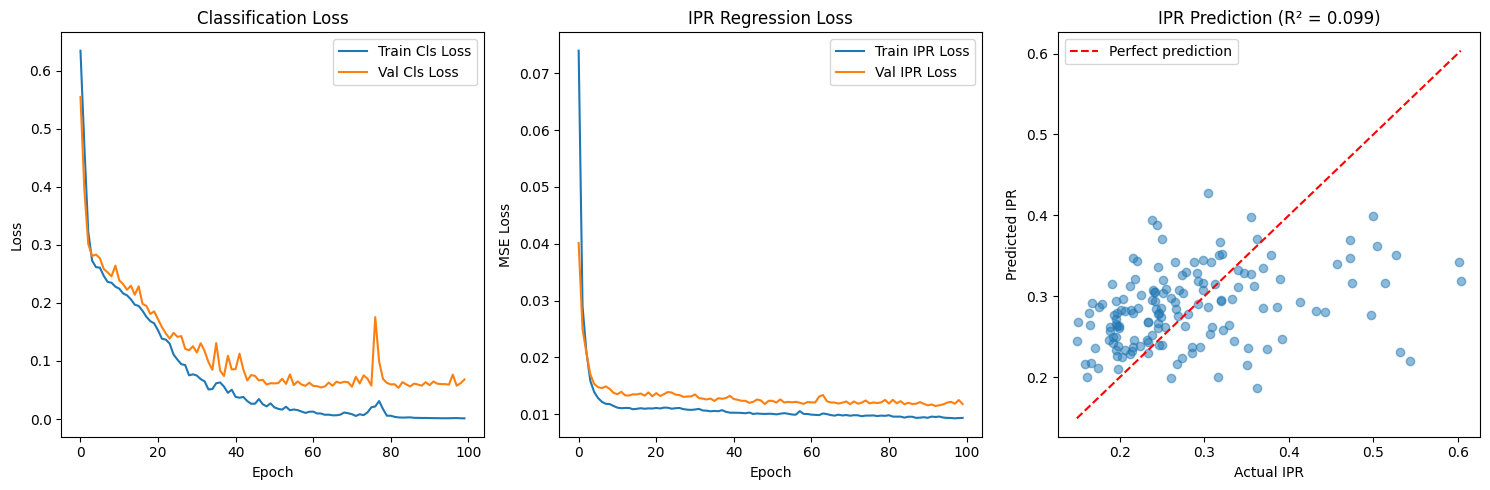


Detailed IPR Analysis:
IPR Prediction Range: [0.187, 0.428]
IPR Actual Range: [0.149, 0.603]


In [ ]:
## Execution Block ##
if __name__ == "__main__":
    n_nodes = 10
    n_features = 3
    n_classes = 2
    n_samples = 1000
    batch_size = 32

    star_adj = create_star_network(n_nodes)
    print(f"star network adjacency matrix shape{star_adj.shape}")

    dataset = StarNetworkDataset(n_samples=n_samples, n_nodes=n_nodes,
                               n_features=n_features, n_classes=n_classes)

    train_size = int(0.7 * n_samples)
    val_size = int(0.15 * n_samples)
    test_size = n_samples - train_size - val_size

    train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(
        dataset, [train_size, val_size, test_size]
    )

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

    model_config = {
        'dimNodeSignals': [n_features, 16, 8],
        'nFilterTaps': [3, 2],
        'bias': True,
        'nonLinearity': nn.ReLU,
        'kHopActivation': [2, 1],
        'nSelectedNodes': [n_nodes, n_nodes//2, n_nodes//4],
        'poolingFunction': lambda n_in, n_out, alpha: nn.AvgPool1d(alpha, stride=alpha),
        'poolingSize': [2, 2],
        'dimLayersMLP': [64, 32],
        'dimLayersIPR': [16, 8], # Keep IPR layers config
        'GSO': star_adj,
        'order': 'Degree',
        'n_classes': n_classes # Pass n_classes to the model config
    }

    model = LocalActivationGNN(**model_config)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    criterion_cls = nn.CrossEntropyLoss()
    criterion_ipr = nn.MSELoss() # Keep IPR criterion
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

    # Pass both criteria to train_model and receive IPR errors
    train_losses, val_losses, val_accuracies, val_ipr_errors = train_model(
        model=model,
        train_loader=train_loader,
        val_loader=val_loader,
        optimizer=optimizer,
        criterion_cls=criterion_cls,
        criterion_ipr=criterion_ipr, # Pass IPR criterion
        epochs=100,
        device=device
    )

    # Call evaluate_model which now returns a dictionary of results
    test_results = evaluate_model(
        model=model,
        test_loader=test_loader,
        device=device
    )

    # Print results
    print(f"\nClassification Results:")
    print(f"Accuracy: {test_results['accuracy']:.4f}")
    print(f"F1 Score: {test_results['f1_score']:.4f}")

    print(f"\nIPR Regression Results:")
    print(f"MAE: {test_results['ipr_mae']:.4f}")
    print(f"RMSE: {test_results['ipr_rmse']:.4f}")
    print(f"R² Score: {test_results['ipr_r2']:.4f}")
    print(f"Correlation: {test_results['ipr_correlation']:.4f}")


    # Plotting results
    plt.figure(figsize=(15, 5))

    # Plot 1: Classification losses
    plt.subplot(1, 3, 1)
    plt.plot(train_losses['cls'], label='Train Cls Loss')
    plt.plot(val_losses['cls'], label='Val Cls Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Classification Loss')

    # Plot 2: IPR regression losses
    plt.subplot(1, 3, 2)
    plt.plot(train_losses['ipr'], label='Train IPR Loss')
    plt.plot(val_losses['ipr'], label='Val IPR Loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.legend()
    plt.title('IPR Regression Loss')

    # Plot 3: IPR predictions vs actual
    plt.subplot(1, 3, 3)
    plt.scatter(test_results['ipr_actuals'], test_results['ipr_predictions'], alpha=0.5)
    min_val = min(np.min(test_results['ipr_actuals']), np.min(test_results['ipr_predictions']))
    max_val = max(np.max(test_results['ipr_actuals']), np.max(test_results['ipr_predictions']))
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect prediction')
    plt.xlabel('Actual IPR')
    plt.ylabel('Predicted IPR')
    plt.title(f'IPR Prediction (R² = {test_results["ipr_r2"]:.3f})')
    plt.legend()

    plt.tight_layout()
    plt.savefig('star_network_results.png')
    plt.show()

    # Additional detailed analysis
    print(f"\nDetailed IPR Analysis:")
    print(f"IPR Prediction Range: [{test_results['ipr_predictions'].min():.3f}, {test_results['ipr_predictions'].max():.3f}]")
    print(f"IPR Actual Range: [{test_results['ipr_actuals'].min():.3f}, {test_results['ipr_actuals'].max():.3f}]")

#**Circle Network**

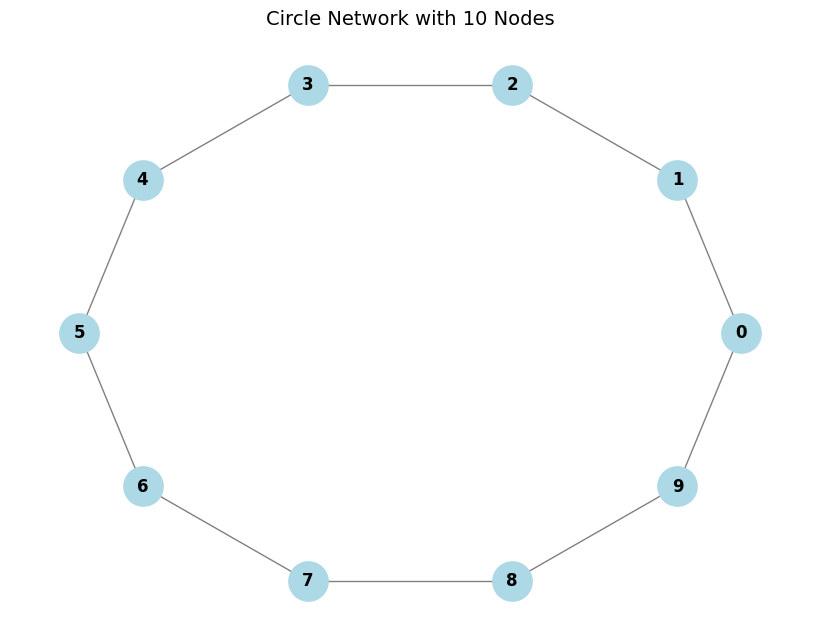

In [45]:
## Defining the GSO ##
from sklearn.metrics import r2_score
def create_circle_network(n_nodes, edge_weight=0.75):
  S = np.zeros((n_nodes,n_nodes))
  for i in range(n_nodes):
    S[i%n_nodes, (i+1)%n_nodes] = edge_weight
    S[(i+1)%n_nodes, i%n_nodes] = edge_weight
  return S
import networkx as nx
import matplotlib.pyplot as plt
n_nodes = 10
circle_graph = nx.from_numpy_array(create_circle_network(n_nodes))
plt.figure(figsize=(8,6))
pos = nx.circular_layout(circle_graph)
nx.draw(circle_graph, pos, with_labels=True, node_size=800, node_color='lightblue',
        font_size=12, font_weight='bold', edge_color='gray')
plt.title(f"Circle Network with {n_nodes} Nodes", fontsize=14)
plt.savefig("circle.png")
plt.show()

In [22]:
from torch_geometric.data import Dataset
class CircleNetworkDataset(Dataset):
  def __init__(self,n_samples=1000, n_nodes=10, n_features=3, n_classes=2):
    self.n_samples = n_samples
    self.n_nodes = n_nodes
    self.n_features = n_features
    self.n_classes = n_classes
    self.adj_matrix = create_circle_network(n_nodes)
    self.data = []
    self.labels = []
    self.ipr_targets = [] ## Store IPR targets

    for _ in range(n_samples):
      features = np.random.randn(n_features, n_nodes)
      features[:,0] += np.random.choice([-2,2], size=n_features)
      label = int(np.mean(features[:,0]) > 0)

      #Calculate IPR target
      node_features_for_ipr = features[0]
      squared = np.abs(node_features_for_ipr) ** 2
      numerator = np.sum(squared ** 2)
      denominator = np.sum(squared) ** 2
      ipr_value = numerator / denominator if denominator != 0 else 0.0
      self.data.append(torch.tensor(features, dtype=torch.float32))
      self.labels.append(label)
      self.ipr_targets.append(ipr_value)

  def __len__(self):
    return self.n_samples

  def __getitem__(self, idx):
    return self.data[idx], self.labels[idx], torch.tensor(self.ipr_targets[idx], dtype=torch.float32)

star network adjacency matrix shape(10, 10)
Epoch 0: Cls Loss: 0.6915, IPR Loss: 0.0110, Val Acc: 47.33%
Epoch 10: Cls Loss: 0.2106, IPR Loss: 0.0105, Val Acc: 88.00%
Epoch 20: Cls Loss: 0.1358, IPR Loss: 0.0103, Val Acc: 90.00%
Epoch 30: Cls Loss: 0.0940, IPR Loss: 0.0102, Val Acc: 91.33%
Epoch 40: Cls Loss: 0.0689, IPR Loss: 0.0101, Val Acc: 90.67%
Epoch 50: Cls Loss: 0.0458, IPR Loss: 0.0100, Val Acc: 90.67%
Epoch 60: Cls Loss: 0.0180, IPR Loss: 0.0099, Val Acc: 89.33%
Epoch 70: Cls Loss: 0.0100, IPR Loss: 0.0097, Val Acc: 90.00%
Epoch 80: Cls Loss: 0.0046, IPR Loss: 0.0096, Val Acc: 89.33%
Epoch 90: Cls Loss: 0.0027, IPR Loss: 0.0095, Val Acc: 89.33%

Classification Results:
Accuracy: 0.8600
F1 Score: 0.8602

IPR Regression Results:
MAE: 0.0794
RMSE: 0.1075
R² Score: -0.0814
Correlation: -0.0194


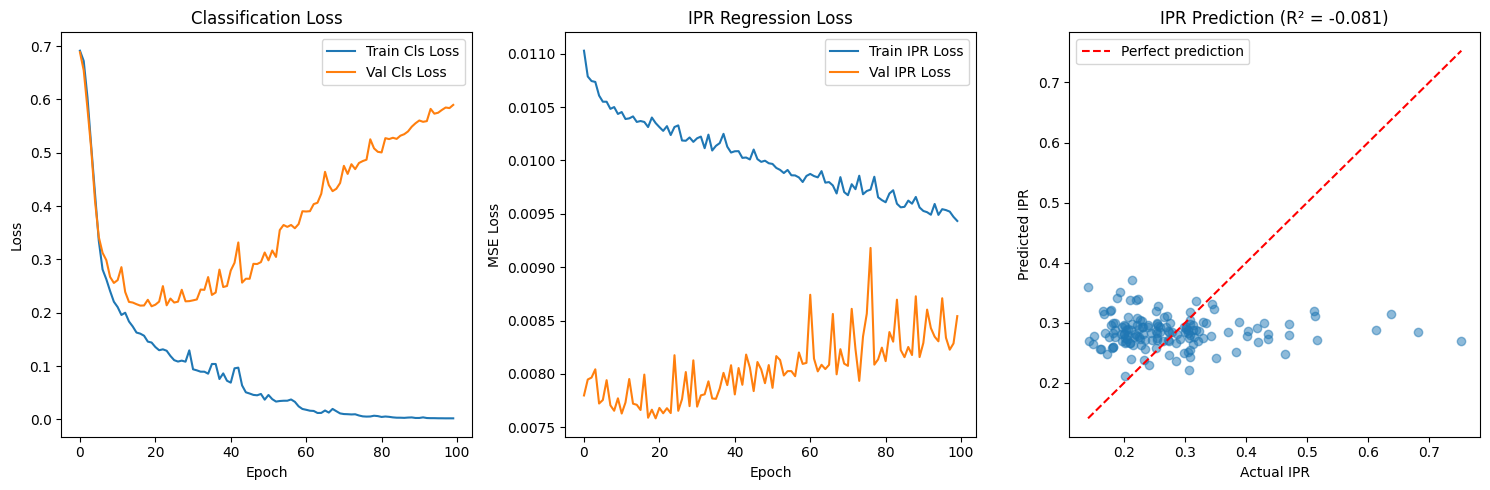


Detailed IPR Analysis:
IPR Prediction Range: [0.211, 0.371]
IPR Actual Range: [0.141, 0.753]


In [24]:
## Execution Block ##
if __name__ == "__main__":
    n_nodes = 10
    n_features = 3
    n_classes = 2
    n_samples = 1000
    batch_size = 32

    star_adj = create_circle_network(n_nodes)
    print(f"star network adjacency matrix shape{star_adj.shape}")

    dataset = CircleNetworkDataset(n_samples=n_samples, n_nodes=n_nodes,
                               n_features=n_features, n_classes=n_classes)

    train_size = int(0.7 * n_samples)
    val_size = int(0.15 * n_samples)
    test_size = n_samples - train_size - val_size

    train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(
        dataset, [train_size, val_size, test_size]
    )

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

    model_config = {
        'dimNodeSignals': [n_features, 16, 8],
        'nFilterTaps': [3, 2],
        'bias': True,
        'nonLinearity': nn.ReLU,
        'kHopActivation': [2, 1],
        'nSelectedNodes': [n_nodes, n_nodes//2, n_nodes//4],
        'poolingFunction': lambda n_in, n_out, alpha: nn.AvgPool1d(alpha, stride=alpha),
        'poolingSize': [2, 2],
        'dimLayersMLP': [64, 32],
        'dimLayersIPR': [16, 8], # Keep IPR layers config
        'GSO': star_adj,
        'order': 'Degree',
        'n_classes': n_classes # Pass n_classes to the model config
    }

    model = LocalActivationGNN(**model_config)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    criterion_cls = nn.CrossEntropyLoss()
    criterion_ipr = nn.MSELoss() # Keep IPR criterion
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

    # Pass both criteria to train_model and receive IPR errors
    train_losses, val_losses, val_accuracies, val_ipr_errors = train_model(
        model=model,
        train_loader=train_loader,
        val_loader=val_loader,
        optimizer=optimizer,
        criterion_cls=criterion_cls,
        criterion_ipr=criterion_ipr, # Pass IPR criterion
        epochs=100,
        device=device
    )

 # Call evaluate_model which now returns a dictionary of results
    test_results = evaluate_model(
        model=model,
        test_loader=test_loader,
        device=device
    )

    # Print results
    print(f"\nClassification Results:")
    print(f"Accuracy: {test_results['accuracy']:.4f}")
    print(f"F1 Score: {test_results['f1_score']:.4f}")

    print(f"\nIPR Regression Results:")
    print(f"MAE: {test_results['ipr_mae']:.4f}")
    print(f"RMSE: {test_results['ipr_rmse']:.4f}")
    print(f"R² Score: {test_results['ipr_r2']:.4f}")
    print(f"Correlation: {test_results['ipr_correlation']:.4f}")


    # Plotting results
    plt.figure(figsize=(15, 5))

    # Plot 1: Classification losses
    plt.subplot(1, 3, 1)
    plt.plot(train_losses['cls'], label='Train Cls Loss')
    plt.plot(val_losses['cls'], label='Val Cls Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Classification Loss')

    # Plot 2: IPR regression losses
    plt.subplot(1, 3, 2)
    plt.plot(train_losses['ipr'], label='Train IPR Loss')
    plt.plot(val_losses['ipr'], label='Val IPR Loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.legend()
    plt.title('IPR Regression Loss')

    # Plot 3: IPR predictions vs actual
    plt.subplot(1, 3, 3)
    plt.scatter(test_results['ipr_actuals'], test_results['ipr_predictions'], alpha=0.5)
    min_val = min(np.min(test_results['ipr_actuals']), np.min(test_results['ipr_predictions']))
    max_val = max(np.max(test_results['ipr_actuals']), np.max(test_results['ipr_predictions']))
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect prediction')
    plt.xlabel('Actual IPR')
    plt.ylabel('Predicted IPR')
    plt.title(f'IPR Prediction (R² = {test_results["ipr_r2"]:.3f})')
    plt.legend()

    plt.tight_layout()
    plt.savefig('Circle_network_results.png')
    plt.show()

    # Additional detailed analysis
    print(f"\nDetailed IPR Analysis:")
    print(f"IPR Prediction Range: [{test_results['ipr_predictions'].min():.3f}, {test_results['ipr_predictions'].max():.3f}]")
    print(f"IPR Actual Range: [{test_results['ipr_actuals'].min():.3f}, {test_results['ipr_actuals'].max():.3f}]")

#**Scale Free Network**

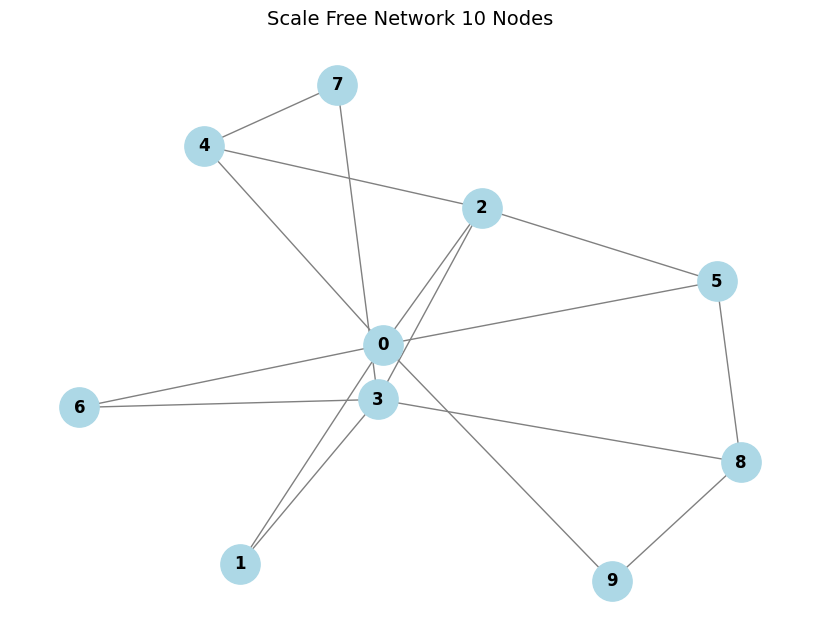

In [44]:
from sklearn.metrics import r2_score
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def create_scalefree_network(n_nodes, m=2, edge_weight=0.75):

  # Create a scale-free graph using Barabási–Albert model
  G = nx.barabasi_albert_graph(n_nodes, m)
  adj_matrix = nx.adjacency_matrix(G).todense()
  S = np.array(adj_matrix, dtype=float) # Converting to float to apply edge weights

  S[S > 0] = edge_weight

  return S

n_nodes = 10
scalefree_adj = create_scalefree_network(n_nodes)
scalefree_graph = nx.from_numpy_array(scalefree_adj)

plt.figure(figsize = (8,6))
pos = nx.spring_layout(scalefree_graph) # Using a different layout(spring layout) for better visualization of scale-free networks
nx.draw(scalefree_graph, pos, with_labels=True, node_size=800, node_color='lightblue',
        font_size=12, font_weight='bold', edge_color='gray')
plt.title(f"Scale Free Network {n_nodes} Nodes",fontsize = 14)
plt.savefig("scalefree.png")
plt.show()

In [41]:
from torch_geometric.data import Dataset
class ScaleFreeNetworkDataset(Dataset):
  def __init__(self,n_samples=1000, n_nodes=10, n_features=3, n_classes=2):
    self.n_samples = n_samples
    self.n_nodes = n_nodes
    self.n_features = n_features
    self.n_classes = n_classes
    self.adj_matrix = create_scalefree_network(n_nodes)
    self.data = []
    self.labels = []
    self.ipr_targets = []

    for _ in range(n_samples):
      features = np.random.randn(n_features, n_nodes)
      features[:,0] += np.random.choice([-2,2], size = n_features)
      label = int(np.mean(features[:,0]) > 0)

      # Calculate IPR target
      node_features_for_ipr = features[0] ## Using the first feature dimension for IPR calculation
      squared = np.abs(node_features_for_ipr) ** 2
      numerator = np.sum(squared ** 2)
      denominator = np.sum(squared) ** 2
      ipr_value = numerator / denominator if denominator != 0 else 0.0
      self.data.append(torch.tensor(features, dtype=torch.float32))
      self.labels.append(label)
      self.ipr_targets.append(ipr_value)
  def __len__(self):
    return self.n_samples

  def __getitem__(self,idx):
    return self.data[idx], self.labels[idx], torch.tensor(self.ipr_targets[idx], dtype=torch.float32)

star network adjacency matrix shape(10, 10)
Epoch 0: Cls Loss: 0.6801, IPR Loss: 0.0911, Val Acc: 61.33%
Epoch 10: Cls Loss: 0.4107, IPR Loss: 0.0130, Val Acc: 78.67%
Epoch 20: Cls Loss: 0.2999, IPR Loss: 0.0118, Val Acc: 81.33%
Epoch 30: Cls Loss: 0.2218, IPR Loss: 0.0114, Val Acc: 82.00%
Epoch 40: Cls Loss: 0.1827, IPR Loss: 0.0113, Val Acc: 82.67%
Epoch 50: Cls Loss: 0.1525, IPR Loss: 0.0112, Val Acc: 83.33%
Epoch 60: Cls Loss: 0.1283, IPR Loss: 0.0111, Val Acc: 83.33%
Epoch 70: Cls Loss: 0.1094, IPR Loss: 0.0108, Val Acc: 82.00%
Epoch 80: Cls Loss: 0.0896, IPR Loss: 0.0107, Val Acc: 83.33%
Epoch 90: Cls Loss: 0.0954, IPR Loss: 0.0107, Val Acc: 82.00%

Classification Results:
Accuracy: 0.8667
F1 Score: 0.8659

IPR Regression Results:
MAE: 0.0866
RMSE: 0.1188
R² Score: -0.0969
Correlation: -0.0047


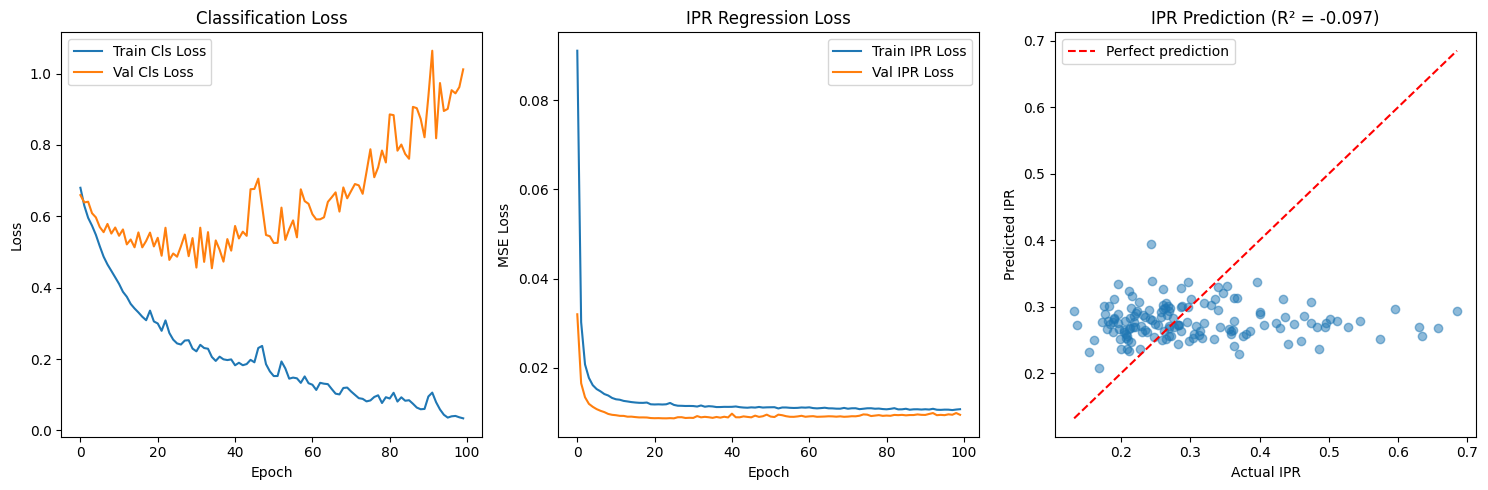


Detailed IPR Analysis:
IPR Prediction Range: [0.208, 0.394]
IPR Actual Range: [0.132, 0.685]


In [43]:
## Execution Block ##
if __name__ == "__main__":
    n_nodes = 10
    n_features = 3
    n_classes = 2
    n_samples = 1000
    batch_size = 32

    star_adj = create_scalefree_network(n_nodes)
    print(f"star network adjacency matrix shape{star_adj.shape}")

    dataset = ScaleFreeNetworkDataset(n_samples=n_samples, n_nodes=n_nodes,
                               n_features=n_features, n_classes=n_classes)

    train_size = int(0.7 * n_samples)
    val_size = int(0.15 * n_samples)
    test_size = n_samples - train_size - val_size

    train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(
        dataset, [train_size, val_size, test_size]
    )

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

    model_config = {
        'dimNodeSignals': [n_features, 16, 8],
        'nFilterTaps': [3, 2],
        'bias': True,
        'nonLinearity': nn.ReLU,
        'kHopActivation': [2, 1],
        'nSelectedNodes': [n_nodes, n_nodes//2, n_nodes//4],
        'poolingFunction': lambda n_in, n_out, alpha: nn.AvgPool1d(alpha, stride=alpha),
        'poolingSize': [2, 2],
        'dimLayersMLP': [64, 32],
        'dimLayersIPR': [16, 8], # Keep IPR layers config
        'GSO': star_adj,
        'order': 'Degree',
        'n_classes': n_classes # Pass n_classes to the model config
    }

    model = LocalActivationGNN(**model_config)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    criterion_cls = nn.CrossEntropyLoss()
    criterion_ipr = nn.MSELoss() # Keep IPR criterion
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

    # Pass both criteria to train_model and receive IPR errors
    train_losses, val_losses, val_accuracies, val_ipr_errors = train_model(
        model=model,
        train_loader=train_loader,
        val_loader=val_loader,
        optimizer=optimizer,
        criterion_cls=criterion_cls,
        criterion_ipr=criterion_ipr, # Pass IPR criterion
        epochs=100,
        device=device
    )

    # Call evaluate_model which now returns a dictionary of results
    test_results = evaluate_model(
        model=model,
        test_loader=test_loader,
        device=device
    )

    # Print results
    print(f"\nClassification Results:")
    print(f"Accuracy: {test_results['accuracy']:.4f}")
    print(f"F1 Score: {test_results['f1_score']:.4f}")

    print(f"\nIPR Regression Results:")
    print(f"MAE: {test_results['ipr_mae']:.4f}")
    print(f"RMSE: {test_results['ipr_rmse']:.4f}")
    print(f"R² Score: {test_results['ipr_r2']:.4f}")
    print(f"Correlation: {test_results['ipr_correlation']:.4f}")


    # Plotting results
    plt.figure(figsize=(15, 5))

    # Plot 1: Classification losses
    plt.subplot(1, 3, 1)
    plt.plot(train_losses['cls'], label='Train Cls Loss')
    plt.plot(val_losses['cls'], label='Val Cls Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Classification Loss')

    # Plot 2: IPR regression losses
    plt.subplot(1, 3, 2)
    plt.plot(train_losses['ipr'], label='Train IPR Loss')
    plt.plot(val_losses['ipr'], label='Val IPR Loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.legend()
    plt.title('IPR Regression Loss')

    # Plot 3: IPR predictions vs actual
    plt.subplot(1, 3, 3)
    plt.scatter(test_results['ipr_actuals'], test_results['ipr_predictions'], alpha=0.5)
    min_val = min(np.min(test_results['ipr_actuals']), np.min(test_results['ipr_predictions']))
    max_val = max(np.max(test_results['ipr_actuals']), np.max(test_results['ipr_predictions']))
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect prediction')
    plt.xlabel('Actual IPR')
    plt.ylabel('Predicted IPR')
    plt.title(f'IPR Prediction (R² = {test_results["ipr_r2"]:.3f})')
    plt.legend()

    plt.tight_layout()
    plt.savefig('scalefree_network_results.png')
    plt.show()

    # Additional detailed analysis
    print(f"\nDetailed IPR Analysis:")
    print(f"IPR Prediction Range: [{test_results['ipr_predictions'].min():.3f}, {test_results['ipr_predictions'].max():.3f}]")
    print(f"IPR Actual Range: [{test_results['ipr_actuals'].min():.3f}, {test_results['ipr_actuals'].max():.3f}]")

In [28]:
import torch

# Generate a 2x2 tensor with random integers between 0 and 1 (inclusive)
random_tensor = torch.randint(0, 2, (10, 10))
print(random_tensor)

tensor([[0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 1, 1, 0],
        [1, 1, 1, 1, 0, 1, 0, 0, 0, 0],
        [1, 0, 0, 1, 1, 0, 1, 0, 0, 1],
        [1, 0, 1, 0, 1, 0, 0, 0, 0, 1],
        [0, 0, 1, 1, 0, 0, 1, 0, 1, 0],
        [1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 1, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 1, 1, 1, 0]])
